In [1]:
from random import randint
import os
import shutil
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, Input
from tensorflow.keras.layers import Flatten, MaxPool2D, AvgPool2D
from tensorflow.keras.layers import BatchNormalization, Reshape, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Model, load_model

seed = 123

In [3]:
# REDES (autoencoder e nn)

# auto encoder (pré processamento)
# px_h, px_v, chnls = 200, 200, 3
# ipt_e = Input(shape = (px_h, px_v, chnls))

# encoder = Conv2D(4, (3, 3), input_shape = (px_h, px_v, chnls), activation = 'relu', padding = 'same')(ipt_e)
# encoder = MaxPool2D((2, 2))(encoder)
# encoder = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(encoder)
# encoder = MaxPool2D((2, 2))(encoder)
# encoder = Conv2D(16, (2, 2), activation = 'relu', padding = 'same')(encoder)
# encoder = Flatten()(encoder)
# encoder = Dense(32, name = 'gargalo')(encoder)

# decoder = Dense(784)(encoder)
# decoder = Reshape(target_shape = (7, 7, 16))(decoder)
# decoder = Conv2D(16, (2, 2), activation = 'relu', padding = 'same')(decoder)
# decoder = UpSampling2D((2, 2))(decoder)
# decoder = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(decoder)
# decoder = UpSampling2D((2, 2))(decoder)
# decoder = Conv2D(4, (3, 3), activation = 'relu', padding = 'same')(decoder)
# decoder = Conv2D(1, (3, 3), activation = 'sigmoid', padding = 'same')(decoder)

# autoencoder = Model(inputs = ipt_e, outputs = decoder, name = 'autoencoder')
# autoencoder.compile(loss = 'mean_squared_error')

# autoencoder.save('autoencoder.h5') 

# alterar arquitetura (não deve ser convolucional)
# nn (predição)
# cnn_i, cnn_j, cnn_chnls = 200, 200, 3

# cnn = Sequential()
# cnn.add(Conv2D(50, (3, 3), input_shape = (cnn_i, cnn_j, cnn_chnls), activation = 'relu'))
# cnn.add(Conv2D(50, (3, 3), input_shape = (cnn_i, cnn_j, cnn_chnls), activation = 'relu'))
# cnn.add(MaxPool2D((2, 2)))
# cnn.add(Conv2D(50, (3, 3), input_shape = (cnn_i, cnn_j, cnn_chnls), activation = 'relu'))
# cnn.add(Conv2D(50, (3, 3), input_shape = (cnn_i, cnn_j, cnn_chnls), activation = 'relu'))
# cnn.add(AvgPool2D((2, 2)))
# cnn.add(Conv2D(50, (3, 3), input_shape = (cnn_i, cnn_j, cnn_chnls), activation = 'relu'))
# cnn.add(BatchNormalization())
# cnn.add(AvgPool2D((2, 2)))
# cnn.add(Flatten())
# cnn.add(Dense(25, activation = 'relu', kernel_regularizer = l2(0.05)))
# cnn.add(Dropout(0.2))
# cnn.add(Dense(25, activation = 'relu', kernel_regularizer = l2(0.05)))
# cnn.add(BatchNormalization())
# cnn.add(Dropout(0.2))
# cnn.add(Dense(25, activation = 'relu', kernel_regularizer = l2(0.05)))
# cnn.add(Dropout(0.2))
# cnn.add(Dense(25, activation = 'relu', kernel_regularizer = l2(0.05)))
# cnn.add(Dense(1, activation = 'sigmoid'))
        
# cnn.compile(loss = 'binary_crossentropy', optimizer = RMSprop(learning_rate = 0.001))

# es = EarlyStopping(monitor = 'loss', patience = 5) 

In [4]:
# # ------- VALIDAÇÃO (extração e pré processamento)

# # tratando
# df_validacao_2017 = pd.read_csv('isic_2017_validacao.csv')

# df_validacao_2017.drop('seborrheic_keratosis', axis = 1, inplace = True)
# df_validacao_2017.columns = ['img', 'pos']
# df_validacao_2017['img'] = df_validacao_2017['img'].apply(lambda x: x + '.jpg')

In [35]:
# # ------- TREINO 2017

# df_treino_2017 = pd.read_csv('isic_2017_treino.csv')

# # adicionando extensão aos nomes dos arquivos
# df_treino_2017['image_id'] = df_treino_2017['image_id'].apply(lambda x: x + '.jpg')

# # criando flag para nevus
# df_treino_2017['nevus'] = ((df_treino_2017.melanoma == 0) & 
#                            (df_treino_2017.seborrheic_keratosis == 0)).astype(float)

# df_treino_2017.drop('seborrheic_keratosis', axis = 1, inplace = True)

# # as imagens precisam ser ou nevus ou melanoma
# df_treino_2017 = df_treino_2017.loc[(df_treino_2017['melanoma'] == 1) | (df_treino_2017['nevus'] == 1)]

# # ------- TREINO 2018

# df_treino_2018 = pd.read_csv('isic_2018_treino.csv')

# # tratando nomes (adicionando extensões aos nomes) e filtrando series 
# df_treino_2018 = df_treino_2018[['image', 'MEL', 'NV']]
# df_treino_2018['image'] = df_treino_2018['image'].apply(lambda x: x + '.jpg')

# # imagens precisam ser ou nevus ou melanoma
# df_treino_2018 = df_treino_2018.loc[(df_treino_2018['MEL'] == 1) | (df_treino_2018['NV'] == 1)]

# # ------- BALANCEAMENTO

# # unificar nomes das series, para eventual concat
# df_treino_2018.columns = ['img', 'pos', 'neg']
# df_treino_2017.columns = ['img', 'pos', 'neg']

# # separando casos positivos e negativos de cada ano
# pos_2018 = df_treino_2018.loc[df_treino_2018['pos'] == 1]
# pos_2017 = df_treino_2017.loc[df_treino_2017['pos'] == 1]

# neg_2018 = df_treino_2018.loc[df_treino_2018['neg'] == 1]
# neg_2017 = df_treino_2017.loc[df_treino_2017['neg'] == 1]

# # juntando casos positivos e negativos de todos os anos
# full_pos = pd.concat([pos_2017, pos_2018], axis = 0)
# full_neg = pd.concat([neg_2017, neg_2018], axis = 0)

# # amostrando aleatoriamente, n dados negativos, estes consistirão nas observações negativas (a amostragem
# # é feita para separar um número de imagens equivalente ao número de imagens positivas que temos à disposição)

# full_neg = full_neg.sample(n = full_pos.shape[0], random_state = seed)

# full_pos = full_pos[['img', 'pos']]
# full_neg = full_neg[['img', 'pos']]

# filenames = pd.concat([full_pos, full_neg]).reset_index().drop('index', axis = 1)

In [37]:
# # dado que possua o datframe com as imagens de treino, esta célula filtra imagens por ano, classe e aloca
# # dados em um diretorio possuindo dois sub diretorios (um para classe positiva e outro para negativa)

# neg_files = filenames.loc[filenames['pos'] == 0]['img'].tolist() 
# pos_files = filenames.loc[filenames['pos'] == 1]['img'].tolist()

# pos_files17 = [i for i in os.listdir('isic_2017_treino') if i in pos_files]
# pos_files18 = [i for i in os.listdir('isic_2018_treino') if i in pos_files]

# neg_files17 = [i for i in os.listdir('isic_2017_treino') if i in neg_files]
# neg_files18 = [i for i in os.listdir('isic_2018_treino') if i in neg_files]

# for f in pos_files17:
#     shutil.copy('isic_2017_treino/' + f, 'train_main/pos')
    
# for f in pos_files18:
#     shutil.copy('isic_2018_treino/' + f, 'train_main/pos')

# for f in neg_files17:
#     shutil.copy('isic_2017_treino/' + f, 'train_main/neg')
    
# for f in neg_files18:
#     shutil.copy('isic_2018_treino/' + f, 'train_main/neg')

In [ ]:
# train_main_pos possui duas pastas 'pos' e 'neg', estas contém, respectivamente, os dados de treino positivos
# e negativos

In [ ]:
# escolhendo valores para redimensionamento

In [13]:
dims = [cv2.imread(f'train_main/pos/{i}').shape for i in os.listdir('train_main/pos')]
i = pd.Series([i[0] for i in dims])
j = pd.Series([i[1] for i in dims])

In [25]:
i.max(), j.max()

(4459, 6708)

In [26]:
i.mean(), j.mean()

(808.8957632817754, 1131.9657027572293)

In [29]:
# me parece melhor opção
i.median(), j.median()

dimensions = (450, 600)

In [110]:
# ao chegar aqui, as imagens já precisam estar pré processadas
# criar nova pasta similar à train_main, mas os dados de seus subdiretorios possuirao imagens pré processadas

def segmentation(path):
    
    img = cv2.imread(path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    # noise removal
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
    # sure background area
    sure_bg = cv2.dilate(opening,kernel,iterations = 3)
    res = cv2.bitwise_and(img,img,mask = sure_bg)
    
    return res

def bgr_CLAHE(img):
    
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    lab_planes = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit = 2.0,tileGridSize = (6, 6))
    lab_planes[0] = clahe.apply(lab_planes[0])
    lab = cv2.merge(lab_planes)
    img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    
    return img

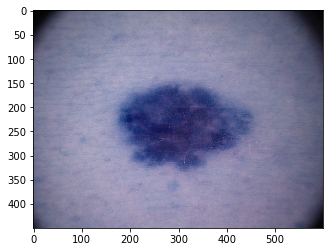

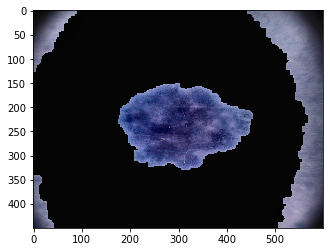

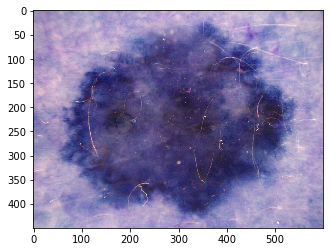

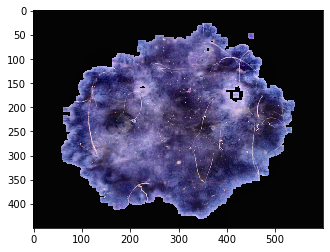

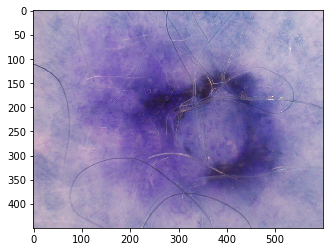

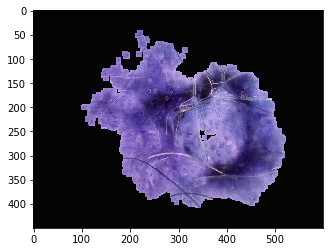

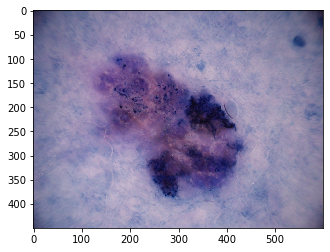

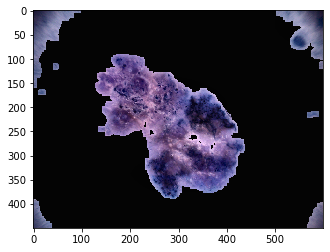

In [111]:
sample_paths = [f'train_main/pos/{i}' for i in os.listdir('train_main/pos')[-5:-1]]
for path in sample_paths:
    plt.imshow(cv2.imread(path))
    plt.show()
    plt.imshow(bgr_CLAHE(segmentation(path)))
    plt.show()

In [34]:
gerador = ImageDataGenerator(
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    horizontal_flip = True,
    vertical_flip = True,
    data_format = None)

# como saber em que ordem passar as classes
gerador_treino = gerador.flow_from_directory('train_main/', 
                                             target_size = dimensions,
                                             batch_size = 100, classes = os.listdir('train_main'))

Found 2974 images belonging to 2 classes.
